In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()

In [9]:
df = housing

In [11]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [12]:
dataset = pd.DataFrame(df.data)

In [13]:
dataset.columns = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

In [15]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
##Independent features and dependent features
X = dataset
y = df.target

In [19]:
##Training Test Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
##Standardizing the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [22]:
##Importing Linear Regression Model
from sklearn.linear_model import LinearRegression

##Cross Validation
from sklearn.model_selection import cross_val_score

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [33]:
np.mean(mse)

-0.5257104326777

In [35]:
reg_pred = model.predict(X_test)

In [36]:
import seaborn as sns

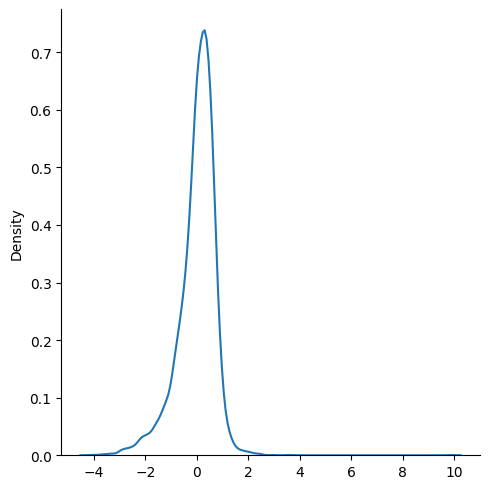

In [39]:
sns.displot(reg_pred-y_test, kind='kde')

In [40]:
from sklearn.metrics import r2_score

In [41]:
score = r2_score(reg_pred, y_test)

In [42]:
score

0.3451339380943985

## Weather Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
dataset = pd.read_csv('weather.csv')

In [11]:
dataset.shape

(1461, 6)

In [12]:
dataset.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


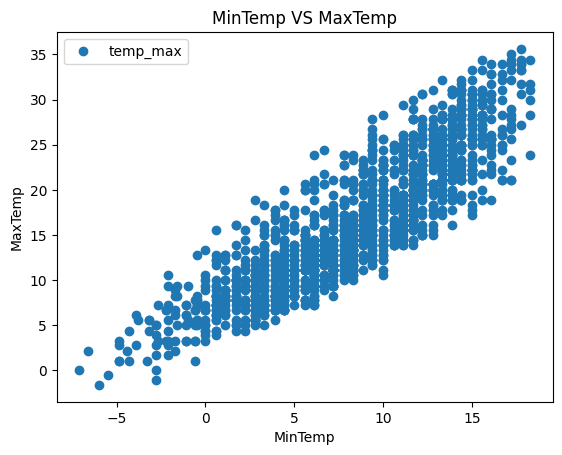

In [14]:
dataset.plot(x='temp_min', y='temp_max', style='o')
plt.title('MinTemp VS MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_11900\780515404.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['temp_max'])


<Axes: xlabel='temp_max', ylabel='Density'>

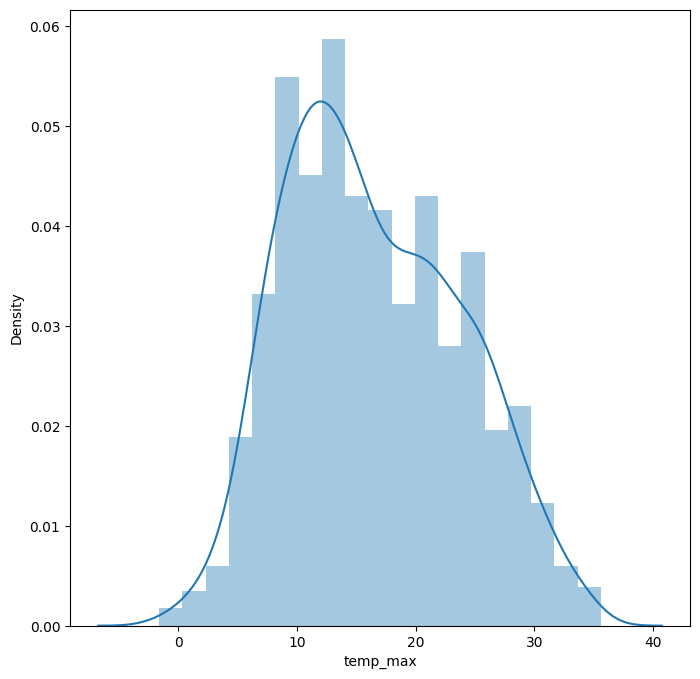

In [25]:
plt.figure(figsize=(8,8))
plt.tight_layout()
sns.distplot(dataset['temp_max'])

In [34]:
#Data Splicing
X = dataset['temp_min'].values.reshape(-1,1)
y = dataset['temp_max'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# Model Building and Training
regressor = LinearRegression()

regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [36]:
# To retreive the intercept
print(f'Intercept: {regressor.intercept_}')

print(f'Coeffecient: {regressor.coef_}')

Intercept: [6.00577259]
Coeffecient: [[1.27128412]]


In [39]:
# Prediction
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,20.0,21.515439
1,10.6,15.921789
2,14.4,18.718614
3,23.9,15.921789
4,12.8,15.159018
...,...,...
288,10.6,11.599423
289,17.2,15.159018
290,22.8,18.718614
291,6.7,10.963781


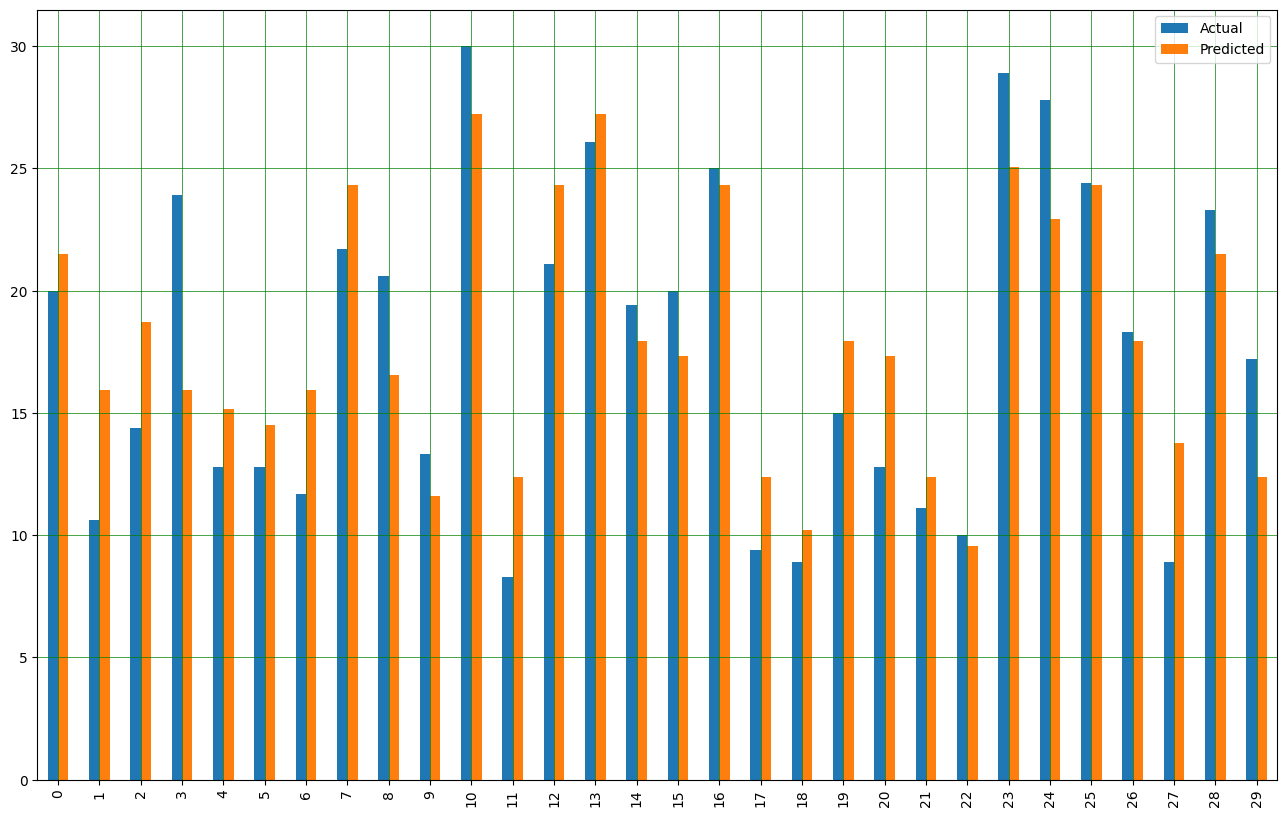

In [47]:
df1 = df.head(30)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

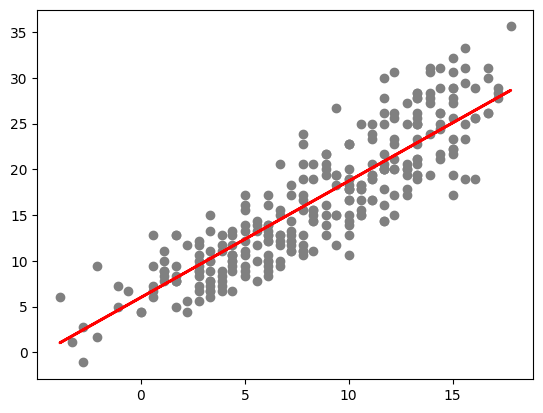

In [52]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)

In [58]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean Absolute Error: 2.814461486372697
Mean Squared Error: 11.89886444956574
Root Mean Squared Error: 3.449473068392583
